(app:oscopes)=
# Chapter 3 - RC Circuits

## Signal Generator Output Impedance
To analyze the output impedance of the signal generator, we need the same libraries that we used in [](#app:resistors). Shift-Enter the following code cell to import these libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Matplotlib is building the font cache; this may take a moment.


We will be fitting a line to our data. Therefore, we create the function for a line first. Next, enter the data from measuring the load voltage for different load resistors. The uncertainty of the resistance comes from the colored bands on the resistors. Choose the highest value your resistors had (5% or 10%). The voltage uncertainty is from your measurement device (the oscilloscope). You will need to estimate what the uncertainty is for each measurement. This is because you may zoom in our out on the oscilloscope and change the uncertainty in doing so.

Once you enter your data, the code will 
* fit the line,
* print the result of the fit,
* plot $1/V_{load}$ vs. $1/R_{load}$ with error bars and the fit line, and
* save the figure as an image.



slope = 21.401148451494684 +/- 0.9377102075333983
intercept = 0.4829961457699425 +/- 0.03321433481061161


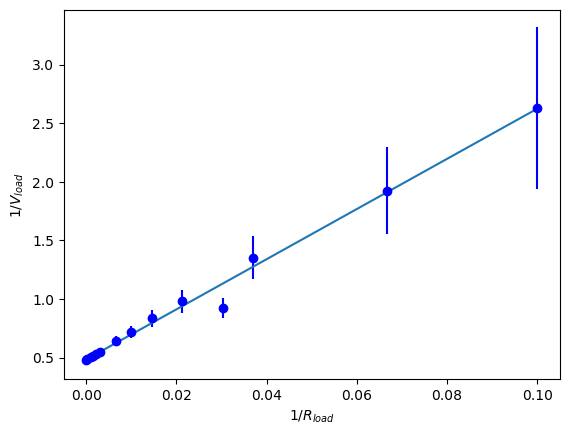

In [2]:
#define a linear function
def line_fit (x, m, b):
	return m*x + b

#Define your data
Rload = np.array([10., 15., 27., 33., 47., 68., 100., 150., 330., 470., 680., 1000., 10000., 22000.])
Rload_unc = 0.05*Rload #gold band resistors
Vload=np.array([0.38, 0.52, 0.74, 1.08, 1.02, 1.20, 1.40, 1.56, 1.84, 1.88, 1.94, 1.98, 2.06, 2.08])
Vload_unc = np.array([0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

#Do the linear fit
parms, cov = curve_fit(line_fit, 1/Rload, 1/Vload, sigma=Vload_unc, absolute_sigma=True)
print("slope =", parms[0], "+/-", np.sqrt(cov[0][0]))
print("intercept =", parms[1], "+/-", np.sqrt(cov[1][1]))

#plot the results
plt.errorbar(1/Rload, 1/Vload, yerr=Vload_unc/Vload**2, fmt='ob') #plot the data
plt.plot(1/Rload, parms[0]*1/Rload+parms[1])
plt.xlabel(r'$1/R_{load}$')
plt.ylabel(r'$1/V_{load}$')
plt.savefig('siggenfit.png')
plt.show()

## Signal Integrity
We can use the line function above, and we do not need to redefine it. We would expect the signal generator and oscilloscope to agree with one another as long as the signal generator creates a clean signal and the oscilloscope can measure it. The code cell below will need your data entered for the signal frequency and oscilloscope frequency. Presumably, you used the same frequencies for sine wave and square wave. Thus, you only need one signal frequency array. You will also enter your data for the fall time. The code below will fit the sine wave and graph the results on a log scale. You'll need to use another code cell or rename the fit variables and repeat the fit code to fit the square wave frequencies. In another code cell, copy the plotting code and change it to plot your fall time data.

[0.99999993 1.54263437] [[4.50282885e-07            nan]
 [           nan 1.71786273e+00]]


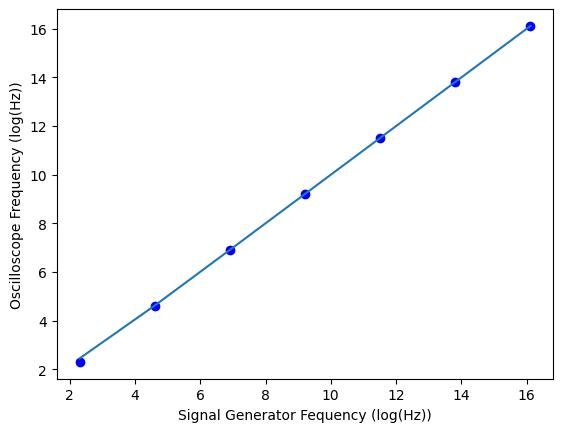

In [4]:
#define your data
signal_f = np.array([10, 100, 1000, 10000, 100000, 1000000, 10000000])
oscope_f_sine = np.array([10.001, 100.002, 1000.01, 10000, 100000, 1000010, 10000000])
oscope_f_sq = np.array([10.0000, 100.000, 1000.01, 10000, 100000, 1000000, 10000000])
fall_time = np.array([41, 41, 37, 37, 40, 40, 51])

#Do the linear fit for sine wave
parms, cov = curve_fit(line_fit, signal_f, oscope_f_sine)
print(parms, np.sqrt(cov))

#plot the sine wave results on a log scale.
plt.plot(np.log(signal_f), np.log(oscope_f_sine), 'ob') #plot the data
plt.plot(np.log(signal_f), np.log(parms[0]*signal_f+parms[1]))
plt.xlabel('Signal Generator Fequency (log(Hz))')
plt.ylabel('Oscilloscope Frequency (log(Hz))')
plt.show()